## Priprava podatkov, osnovne statistike in vizualizacija

Podatkovno rudarjenje, naloga, `21.03. 2022`  
**`Matic Knez`**

Neizogiben del vsakega projekta na področju podatkovnega rudarjenja je iskanje,
urejanje in priprava podatkov. V tej nalogi boste spoznali primer podatkovne
zbirke in uporabili postopke za pretvorbo podatkov v ustrezno obliko ter pregled in
prikaz osnovnih statistik.

### Podatki

V nalogi boste pregledali in pripravili podatke gledanosti Hollywoodskih filmov
zbirke [MovieLens](https://grouplens.org/datasets/movielens/) v obdobju **1995-2016**.

Iste podatke boste uporabili v vseh nalogah, zato jih dodobra spoznajte. Gre za podatkovno zbirko za
vrednotenje priporočilnih sistemov, ki vsebuje gledalce ter njihove ocene za posamezni film na lestvici 1 do 5. 
Poleg osnovne matrike uporabnikov in ocen vsebuje še dodatne podatke o filmih (npr. žanr, datum, oznake,
igralci).

Podatki so v mapi `./podatki/ml-latest-small`. Podatkovna zbirka vsebuje naslednje datoteke:

* ratings.csv: podatki o uporabnikih in ocenah,
* movies.csv: podatki o žanrih filmov,
* cast.csv: podatki o igralcih,
* tags.csv: podatki o oznakah (ang. \emph{tags}),
* links.csv: povezave na sorodne podatkovne zbirke.


Pred pričetkom reševanja naloge si dobro oglejte podatke in datoteko **README.txt**. Podrobnosti o zbirki lahko preberete na [spletni strani](http://files.grouplens.org/datasets/movielens/ml-latest-small-README.html).

Pripravite metode za nalaganje podatkov v ustrezne podatkovne strukture. Te vam bodo prišle
prav tudi pri nadaljnjih nalogah.
Bodite pozorni na velikost podatkov.

Zapišite kodo za branje datotek in pripravo ustreznih matrik (in drugih struktur) podatkov, ki jih boste uporabi pri odgovarjanju na spodnja vprašanja.

Kodo lahko razdelite v več celic.

In [1]:
from csv import DictReader
import numpy as np
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:0.1f}'.format})

In [2]:
# raiting_data (list)
# user id, movie id, raiting, date

raiting_data = []
reader = DictReader(open('podatki/ml-latest-small/ratings.csv', 'rt', encoding='utf-8'))
for row in reader:
    tab = []
    tab.append(row["userId"])
    tab.append(row["movieId"])
    tab.append(row["rating"])
    tab.append(row["timestamp"])
    raiting_data.append(tab) 

raiting_data = np.asarray(raiting_data, dtype=np.float64) # convert to numpy array 
raiting_data.shape

(100004, 4)

In [3]:
# movies_data (dictionary) 
# key = movie id
# value = title, genre

movies_data = dict()
reader = DictReader(open('podatki/ml-latest-small/movies.csv', 'rt', encoding='utf-8'))
for row in reader:
    movies_data[float(row["movieId"])] = (row["title"], row["genres"])
    
len(movies_data)

9125

V zgornjih 2 primerih smo s pomocjo DictReader po vrsticah brali datoteko in podatke (vrstice) shranjevali v tabelo in slovar.

### Vprašanja

Glavni namen podatkovnega rudarjenja je *odkrivanje znanj iz podatkov*,
torej odgovarjanje na vprašanja z uporabo računskih postopkov.

Z uporabo principov, ki ste jih spoznali na vajah in predavanjih, odgovorite na
spodnja vprašanja. Pri vsakem vprašanju dobro premislite, na kakšen način boste
najbolje podali, prikazali oz. utemeljili odgovor. Bistven del so odgovori na
vprašanja in ne implementacija vaše rešitve.

#### 1. vprašanje (15%):
Kateri filmi so v povprečju najbolje ocenjeni?  Pripravite seznam
filmov ter njihovih povprečnih ocen in izpišite 10 filmov z vrha seznama.
Opazite pri takem ocenjevanju kakšno težavo? Kako bi jo lahko rešili? Kakšni so
rezultati tedaj?

Kodo lahko razdelite v več celic.

In [4]:
# v tabelo shranimo vse filme, ki so bili v datoteki rating ocenjeni 
movies = [movie for movie in raiting_data[:, 1]]
# ker so posamezni filmi bili ocenjeni veckrat, izlocimo duplikate
movies = np.unique(movies)

# funkcija filtrira vrstice glede na vhodni parameter (movie)
# vrne tabelo ocen
def ocene_filma(movie):
    row = raiting_data[:, 1] == movie
    return raiting_data[row, 2]

# izracunamo povprecje ocen
# v tabelo (povprecja) shranimo povprecje in film
povprecja = [(np.mean(ocene_filma(movie)), movie) for movie in movies]

# povprecja filmov sortiramo
sorted_povp = sorted(povprecja, reverse=True)

In [5]:
# izpisemo prvih 10 elementov (najbolje ocenjenih) 

#najboljsi = sorted_povp[-10:] # najslabsih 10
najboljsi = sorted_povp[:10]
for movie in najboljsi:
    print("Povp:", movie[0], movies_data[movie[1]])

Povp: 5.0 ('The Beatles: Eight Days a Week - The Touring Years (2016)', 'Documentary')
Povp: 5.0 ('Rustom (2016)', 'Romance|Thriller')
Povp: 5.0 ('The Last Brickmaker in America (2001)', 'Drama')
Povp: 5.0 ('Survive and Advance (2013)', '(no genres listed)')
Povp: 5.0 ('Ice Age: The Great Egg-Scapade (2016)', 'Adventure|Animation|Children|Comedy')
Povp: 5.0 ('The Last Days of Emma Blank (2009)', 'Comedy')
Povp: 5.0 ('Me Before You (2016)', 'Drama|Romance')
Povp: 5.0 ('Making a Murderer (2015)', 'Documentary')
Povp: 5.0 ('World of Tomorrow (2015)', 'Animation|Comedy')
Povp: 5.0 ('Schneider vs. Bax (2015)', 'Comedy|Thriller')


In [6]:
# TEZAVA v primeru, da imamo ocen za nek filem premalo (< 5)
# v tem primeru je lahko povprecje slabo ocenjeno 

# Da se prepricamo ali je res tako, izpisemo stevilo ocen pri vsakem filmu
povprecja_stocenjenih = [(np.mean(ocene_filma(movie)), movie, len(ocene_filma(movie))) for movie in movies]
sorted_povp_st = sorted(povprecja_stocenjenih, reverse=True)

In [7]:
# izpisemo najboljsih in najslabsih 10 in vidimo, da imajo vsi izpisani samo po 1 oceno
# povprecna ocena je tako sestavljena iz samo 1 ocene, kar pomeni da je slaba ocena za povprecje

najslabsi_st = sorted_povp_st[-10:] # najslabsih 10
najboljsi_st = sorted_povp_st[:10]

print("10 najbolse ocenjenih:")
for movie in najboljsi_st:
    print("Povp:", movie[0], "st. ocen:", movie[2], movies_data[movie[1]])
print()
print("10 najslabse ocenjenih:")
for movie in najslabsi_st:
    print("Povp:", movie[0], "st. ocen:", movie[2], movies_data[movie[1]])

10 najbolse ocenjenih:
Povp: 5.0 st. ocen: 1 ('The Beatles: Eight Days a Week - The Touring Years (2016)', 'Documentary')
Povp: 5.0 st. ocen: 1 ('Rustom (2016)', 'Romance|Thriller')
Povp: 5.0 st. ocen: 1 ('The Last Brickmaker in America (2001)', 'Drama')
Povp: 5.0 st. ocen: 1 ('Survive and Advance (2013)', '(no genres listed)')
Povp: 5.0 st. ocen: 1 ('Ice Age: The Great Egg-Scapade (2016)', 'Adventure|Animation|Children|Comedy')
Povp: 5.0 st. ocen: 1 ('The Last Days of Emma Blank (2009)', 'Comedy')
Povp: 5.0 st. ocen: 1 ('Me Before You (2016)', 'Drama|Romance')
Povp: 5.0 st. ocen: 1 ('Making a Murderer (2015)', 'Documentary')
Povp: 5.0 st. ocen: 1 ('World of Tomorrow (2015)', 'Animation|Comedy')
Povp: 5.0 st. ocen: 1 ('Schneider vs. Bax (2015)', 'Comedy|Thriller')

10 najslabse ocenjenih:
Povp: 0.5 st. ocen: 1 ('Funny Lady (1975)', 'Comedy|Musical')
Povp: 0.5 st. ocen: 1 ('Vamp (1986)', 'Comedy|Horror')
Povp: 0.5 st. ocen: 1 ('Worth Winning (1989)', 'Comedy')
Povp: 0.5 st. ocen: 1 ('Ar

Vidimo, da filmi z zelo slabo oceno (0,5 - 1,5) imajo samo 1 oceno in enako na drugem koncu filmi z zelo dobro oceno (4,5 - 5) imajo ravno tako 1 ocena.

Ker je povprecna ocena teh filmov sestavljena le iz 1 same ocene pomeni, da je ta povprecna ocena za film slaba.

Da bi bila povprecna ocena filma dobra, bi potrebovali vsaj 10 ocen.

Vec kot imamo ocen, bolj tocna je povprecna ocena.

Tezavo resimo tako, da upostevamo le filme, pri katerih je vec kot 10 ocen (if len(ocene_filma(movie)) > 10).

In [8]:
# dodamo len(ocene_filma(movie)) > 10, ki izloci filme, ki imajo manj kot 10 ocen
povprecja2 = [(np.mean(ocene_filma(movie)), movie, len(ocene_filma(movie))) for movie in movies if len(ocene_filma(movie)) > 10]
sorted_povp2 = sorted(povprecja2, reverse=True)

In [9]:
najslabsi_st2 = sorted_povp2[-1:-10:-1]
najboljsi_st2 = sorted_povp2[:10]
print("10 povprecno najboljse ocenjenih filmov:")
for movie in najboljsi_st2:
    print("Povprecje:", "{:.2f}".format(movie[0]), "st. ocen:", movie[2], movies_data[movie[1]])
print()
print("10 povprecno najslabse ocenjenih filmov:")
for movie in najslabsi_st2:
    print("Povprecje:", "{:.2f}".format(movie[0]), "st. ocen:", movie[2], movies_data[movie[1]])

10 povprecno najboljse ocenjenih filmov:
Povprecje: 4.64 st. ocen: 11 ('Best Years of Our Lives, The (1946)', 'Drama|War')
Povprecje: 4.54 st. ocen: 12 ('Inherit the Wind (1960)', 'Drama')
Povprecje: 4.49 st. ocen: 200 ('Godfather, The (1972)', 'Crime|Drama')
Povprecje: 4.49 st. ocen: 311 ('Shawshank Redemption, The (1994)', 'Crime|Drama')
Povprecje: 4.46 st. ocen: 12 ('Tom Jones (1963)', 'Adventure|Comedy|Romance')
Povprecje: 4.45 st. ocen: 11 ('Gladiator (1992)', 'Action|Drama')
Povprecje: 4.45 st. ocen: 29 ('On the Waterfront (1954)', 'Crime|Drama')
Povprecje: 4.44 st. ocen: 16 ('When We Were Kings (1996)', 'Documentary')
Povprecje: 4.43 st. ocen: 38 ('All About Eve (1950)', 'Drama')
Povprecje: 4.42 st. ocen: 26 ('Ran (1985)', 'Drama|War')

10 povprecno najslabse ocenjenih filmov:
Povprecje: 1.21 st. ocen: 19 ('Battlefield Earth (2000)', 'Action|Sci-Fi')
Povprecje: 1.65 st. ocen: 23 ('Speed 2: Cruise Control (1997)', 'Action|Romance|Thriller')
Povprecje: 1.71 st. ocen: 12 ('Police A

Seznam povpvprecji smo ponovno zgradili tako, da nismo upostevali primere, kejer je manj kot 10 ocen.

Povprecne ocene filmov zgledajo bolj tocne.

#### 2. vprašanje (15%):
Posamezni film pripada enemu ali več žanrom. 
Koliko je vseh žanrov? Prikaži porazdelitev žanrov z uporabo ustrezne
vizualizacije.

Kodo lahko razdelite v več celic.

In [10]:
from collections import defaultdict

# vse zanre shranimo v slovar in stejemo vse njihove pojavitve v filmih

zanri_data = defaultdict(int)
for title, zanri in movies_data.values():
    for zanr in zanri.split('|'):
        zanri_data[zanr] += 1
zanri_data

defaultdict(int,
            {'Adventure': 1117,
             'Animation': 447,
             'Children': 583,
             'Comedy': 3315,
             'Fantasy': 654,
             'Romance': 1545,
             'Drama': 4365,
             'Action': 1545,
             'Crime': 1100,
             'Thriller': 1729,
             'Horror': 877,
             'Mystery': 543,
             'Sci-Fi': 792,
             'Documentary': 495,
             'IMAX': 153,
             'War': 367,
             'Musical': 394,
             'Western': 168,
             'Film-Noir': 133,
             '(no genres listed)': 18})

In [11]:
len(zanri_data) - 1
# vseh zanrov je 19
# nekaj filmov pa je brez zanra (No genres listed)

19

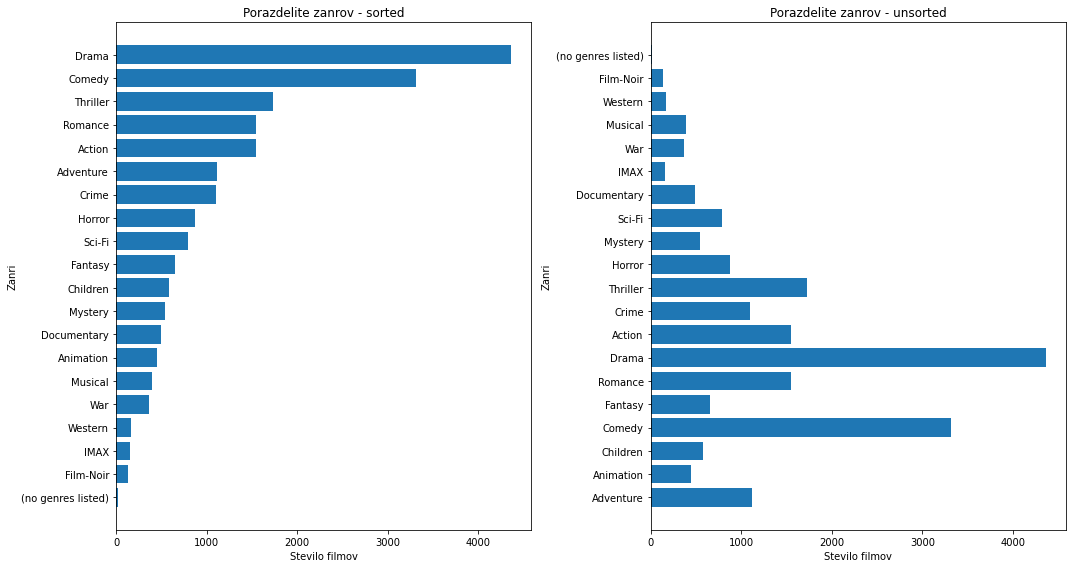

In [12]:
import matplotlib.pyplot as plt

# definiramo 2 plota
fig, axes = plt.subplots(1,2, figsize=(15,8))

x = list(zanri_data.keys()) # zanri
y = [zanri_data[key] for key in x]  # st. filmov za posamezen zanr

# obrnemo tabelo, da lahko sortiramo po stevilo filmov
zanri_tab = [(cnt, zanr) for zanr, cnt in zanri_data.items()]
zanri_tab = sorted(zanri_tab)

x1 = []
y1 = []
for cnt, zanr in zanri_tab:
    x1.append(zanr)
    y1.append(cnt)

axes[0].barh(x1, y1)
axes[1].barh(x, y)

axes[0].set_title("Porazdelite zanrov - sorted")
axes[1].set_title("Porazdelite zanrov - unsorted")

axes[0].set_xlabel("Stevilo filmov")
axes[1].set_xlabel("Stevilo filmov")
axes[0].set_ylabel("Zanri")
axes[1].set_ylabel("Zanri")

fig.tight_layout()
plt.show()

Najprej sem iz datoteke v slovar shranil zanre in njihove pojavitve v filmih.

Iz tega sem ugotovil, da je vseh zanrov 19.

Nato sem porazdelitev zanrov prikazal s horizontalnim grafom (barh).

#### 3. vprašanje (20%):
Število ocen (ogledov) se za posamezni film razlikuje. Ali
obstaja povezava med gledanostjo in povprečno oceno filma? Opišite postopek, ki
ste ga uporabili pri odgovarjanju na vprašanje.

Kodo lahko razdelite v več celic.

In [13]:
# sestavimo tabelo povprecen ocene, stevilo ocen, film
# tabelo nato pretvorimo v numpy array za lazje operacije
povprecja3 = [(np.mean(ocene_filma(movie)), len(ocene_filma(movie)), movie) for movie in movies if len(ocene_filma(movie)) > 10]
ocene = np.asarray(povprecja3, dtype=np.float64)

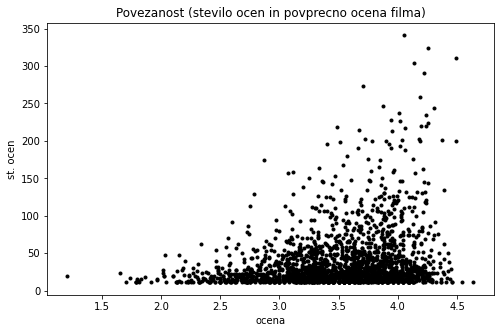

In [14]:
# da preverimo povezanost med gledanostjo in povprecno oceno izrisemo razsevni diagram (scatter plot)

# x os - povprecna ocena
# y os - stevilo ocen
x = ocene[:, 0]
y = ocene[:, 1]

plt.figure(figsize = (8, 5))
plt.plot(x, y, "k.")

plt.title("Povezanost (stevilo ocen in povprecno ocena filma)")
plt.xlabel('ocena')
plt.ylabel('st. ocen')

plt.show()

Vidimo, da ni nekaksne velike povezanosti med povprecno oceno in stevilo ocen filma. 

Opazimo, da so filmi, ki so prejeli najvec ocen, povprecno ocenjeni s 3 do 4.5 povprecno vrednostjo.

Povezanost preverimo se s Pearsonovim koeficientom korelacije.

In [15]:
def pearson(x, y):
    return (x - np.mean(x)) * (y - np.mean(y)) / (np.std(x) * np.std(y))
x = ocene[:, 0]    # povprecne ocene
y = ocene[:, 1]    # st. ocen (gledanost)
pearson(x, y).mean() # koleracija je velika (blizu 1)

0.24446724589268085

Koeficient koleracije med povprecno oceno in stevilom ocen filma je 0.244, kar pomeni da je povezava med tema 2 atributoma mala (sibka).

Povezanost med 2 atributoma predstavimo se s funkcijo poradelitve.

In [16]:
# povprecja sortiramo po povprecnih ocenah
sorted_povp3 = sorted(povprecja3, reverse=True)

#najboljsi_st2 = sorted_povp2[-30:]
najboljsi_st2 = sorted_povp3[:10]
for movie in najboljsi_st2:
    print("Povp:", "{:.2f}".format(movie[0]), "st. ocen", movie[1], movies_data[movie[2]])

Povp: 4.64 st. ocen 11 ('Best Years of Our Lives, The (1946)', 'Drama|War')
Povp: 4.54 st. ocen 12 ('Inherit the Wind (1960)', 'Drama')
Povp: 4.49 st. ocen 200 ('Godfather, The (1972)', 'Crime|Drama')
Povp: 4.49 st. ocen 311 ('Shawshank Redemption, The (1994)', 'Crime|Drama')
Povp: 4.46 st. ocen 12 ('Tom Jones (1963)', 'Adventure|Comedy|Romance')
Povp: 4.45 st. ocen 11 ('Gladiator (1992)', 'Action|Drama')
Povp: 4.45 st. ocen 29 ('On the Waterfront (1954)', 'Crime|Drama')
Povp: 4.44 st. ocen 16 ('When We Were Kings (1996)', 'Documentary')
Povp: 4.43 st. ocen 38 ('All About Eve (1950)', 'Drama')
Povp: 4.42 st. ocen 26 ('Ran (1985)', 'Drama|War')


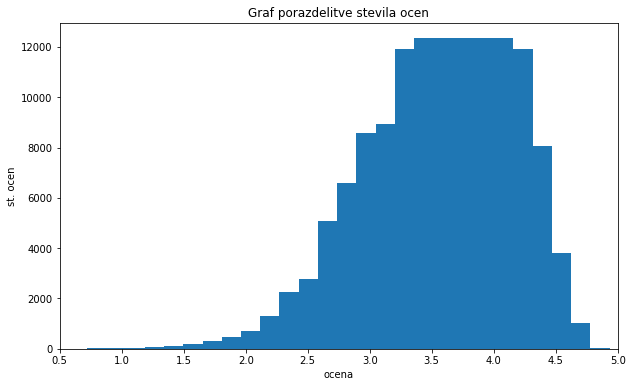

In [17]:
# stevilo ocen na intervalih ocen

n = 30 # stevilo intervalov med 0,5 in 5
porazdelitev_ocen = []

# povprecne ocene filmov razdelimo na intervale 

for interval in np.linspace(0.5,5,n):
    porazdelitev_ocen.append(sum(movie[1] for movie in sorted_povp3 if ((interval + (5/n)) > movie[0] > interval))) 
            
y = porazdelitev_ocen
x = np.linspace(0.5,5,n)

plt.figure(figsize = (10, 6))
plt.bar(x, y)
plt.title("Graf porazdelitve stevila ocen")
plt.xlabel('ocena')
plt.ylabel('st. ocen')
plt.xlim(0.5, 5)

plt.show()

Stevilo ocen smo razporedili na intervale od [0.5 do 5].

Ugotovimo, da je najvec ocen (gledanost) pri filmih, ki so povprecno ocenjeni med 3 in 4 oceno.

#### 4. vprašanje (30%):
Vsaka ocena je bila vnešena na določen datum (stolpec
*timestamp*).  Ali se popularnost posameznih filmov s časom spreminja?
Problem reši tako, da za dani film ocene razporediš po času ter v vsaku časovni
točki izračunaš povprečje za zadnjih 30, 50, ali 100 ocen. Nariši graf, kako se
ocena spreminja in ga prikaži za dva zanimiva primera filmov.

Kodo lahko razdelite v več celic.

In [18]:
# kot primer bom poiskal 3 filme in jih med seboj primerjal
# izbral sem naslendje filme (id): 34, 150, 165

from datetime import datetime

# izbor filmov, glede na stevilo ocen
movies_data = defaultdict(int)
for id_osebe, id_filma, xy, yx  in raiting_data:
    movies_data[id_filma] += 1
#movies_data

In [19]:
# funkcija nam vrne x (casovne intervale) in y (povprecen ocene)

def povprecna_ocena (movie_n, st_ocen_interval):
    
    movie_time = []
    # sestavimo tabelo ocen filma_x (datum, ocena)
    for row in raiting_data:
        if(row[1] == movie_n):
            movie_time.append((row[3], row[2]))

    # ocene sortiramo glede na datum        
    movie_time = sorted(movie_time, reverse=True)
    
    # dolocimo zacetek in konec x osi (casovne tocke)
    zacetek = movie_time[-1][0]
    konec = movie_time[0][0]

    
    povp_ocene = []
    interval_prej = 0
    
    # pripravimo casovne tocke glede na zacetek, konec in st_ocen na interval
    for interval in np.linspace(zacetek, konec, int(len(movie_time) / st_ocen_interval)):
        if(interval_prej != 0):
            # za vsako inteval med casovnimi tockami izracunamo povprecnno oceno
            povp_ocene.append(np.mean([ocena[1] for ocena in movie_time if interval >= (ocena[0]) > interval_prej]))
        interval_prej = interval

    y = povp_ocene
    x = np.linspace(zacetek, konec, int(len(movie_time) / st_ocen_interval))
    x = np.delete(x, 0)
    
    return x, y

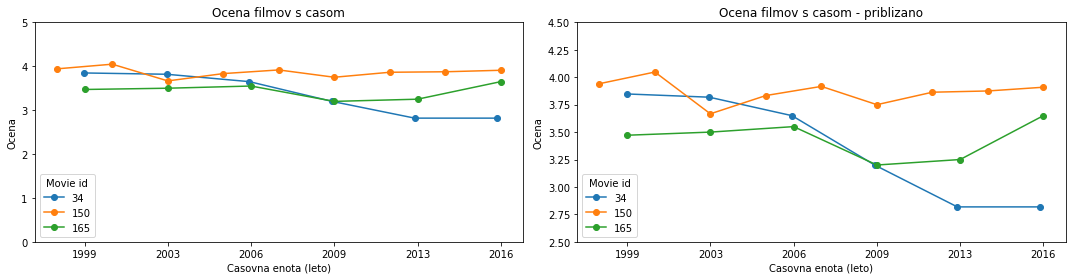

In [20]:
#[34, 150, 165]
sez_filmov = [34, 150, 165]

fig, axes = plt.subplots(1, 2, figsize=(15,4))

for film in sez_filmov:
    x,y = povprecna_ocena(film, 20)
    axes[0].plot(x, y, marker = 'o', label = film)
    axes[1].plot(x, y, marker = 'o', label = film)

axes[0].set_ylim(0,5, 5)
axes[1].set_ylim(2.5, 4.5)

axes[0].set_xticks(x)
axes[0].set_xticklabels([datetime.fromtimestamp(x).strftime('%Y') for x in x])

axes[1].set_xticks(x)
axes[1].set_xticklabels([datetime.fromtimestamp(x).strftime('%Y') for x in x])


axes[0].legend(title="Movie id", loc=3)
axes[1].legend(title="Movie id", loc=3)

axes[0].set_title("Ocena filmov s casom")
axes[1].set_title("Ocena filmov s casom - priblizano")

axes[0].set_xlabel("Casovna enota (leto)")
axes[0].set_ylabel("Ocena")
axes[1].set_xlabel("Casovna enota (leto)")
axes[1].set_ylabel("Ocena")

fig.tight_layout()
plt.show()

Odgovor: **zapišite utemeljitev odgovora**

S funkcijo **povprecna_ocena** izracunamo povprecne ocene glede na casovne intervale.

Nato za vsak cosovni interval na grafu pokazemo povprecje ocen na tem intervalu. 

Tako dobimo graf spreminjanja ocene na dolocenem casovnem intervalu.

Na grafu smo za 3 filme (za id: 34, 150, 165) izrisali spreminjanje ocene glede na casovni interval (stevilo ocen v tem casu).

Opazimo, da pri film z id **150** popularnost ostaja priblizno enaka skozi leta.

Pri filmu z id **34** opazimo, da zacne pri oceni ~ 3.85 in skozi leta ocena pada, na koncu pristane na ~ 2.8.

Pri filmu z id **165** pa opazimo, da zacne pri ~ 3.55, skozi leta malo pada in proti kocu zraste na ~ 3.6 (vec kot na zacetku).

#### 5. vprašanje (20%):
Kako bi ocenili popularnost posameznih igralcev? Opišite postopek
ocenitve ter izpišite 10 najbolj popularnih igralcev.

Kodo lahko razdelite v več celic.

In [21]:
# popularnost posameznih igralcev bom ocenil glede na stevilo pojavitev v razlicnih filmih
# v vecih filmih kot je igralec nastopal, bolj popularen naj bi igralec bil 
# igralce bom dodal v slovar kot kljuc, kot vrednost pa bom stel vsako pojavitev v filmu

igralci_cnt = defaultdict(int)

reader = DictReader(open('podatki/ml-latest-small/cast.csv', 'rt', encoding='utf-8'))
for row in reader:
    for igralec in row["cast"].split('|'):
        igralci_cnt[igralec] += 1

# podatke iz slovarja shranim v seznam (na zacetku stevilo pojavitev, da lahko seznam sortiramo)        
cnt_igralci = ((cnt, igralec) for igralec, cnt in igralci_cnt.items())

# seznam sortiramo po stevilo pojavitev
cnt_igralci_sort = sorted(cnt_igralci, reverse=True)

print("10 najbolj popularnih igralcev:")
print("(igralec - stevilo pojavitev)")
print()
for i in range(1, 11):
    print(cnt_igralci_sort[i][1], "-", cnt_igralci_sort[i][0])


10 najbolj popularnih igralcev:
(igralec - stevilo pojavitev)

Robert De Niro - 66
Michael Caine - 56
Bruce Willis - 56
Morgan Freeman - 54
Christopher Walken - 51
Richard Jenkins - 50
Nicolas Cage - 50
Steve Buscemi - 49
John Goodman - 48
Bill Murray - 47


Odgovor: **zapišite utemeljitev odgovora**

Popularnost posameznih igralcev sem ocenil glede na stevilo pojavitev v razlicnih filmih.

V vecih filmih kot je igralec nastopal, bolj popularen naj bi igralec bil. 

Igralce sem dodal v slovar kot kljuc, kot vrednost pa sem stel vsako pojavitev v filmu. ( file - cast.csv)

Ko sem zgradil slovar, sem podatke zapisal v seznam. 
Na 1. mesto sem dodal stevilo pojavitev igralca, da lahko seznam sortiram.

Na koncu sem izpisal prvih 10 igralcev in stevilo njihovih pjavitev v filmih.

#### Bonus vprašanje (5%):

Kateri je tvoj najljubši film? Zakaj?

Odgovor: **zapišite utemeljitev odgovora**

**Interstellar** - film mi je zelo zanimiv, ker se dogaja okoli potovanja skozi cas in dimenzije. Tezko si je prestavljati kako malo znanja o dogajanju in pojavih na ravni vesolja imamo. 

### Zapiski
Za nalaganje podatkov lahko uporabite modul `csv`.

In [22]:
from csv import DictReader

reader = DictReader(open('podatki/ml-latest-small/ratings.csv', 'rt', encoding='utf-8'))
for row in reader:
    user = row["userId"]
    movie = row["movieId"]
    rating = row["rating"]
    timestamp = row["timestamp"]

Podatki v zadnji vrstici datoteke:

In [23]:
user, movie, rating, timestamp

('671', '6565', '3.5', '1074784724')

Pretvorba časovnega formata (*Unix time*). Kode za oblikovanje so navedene v dokumentaciji modula [`datetime`](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

In [24]:
from datetime import datetime

t = 1217897793 # Unix-time
ts = datetime.fromtimestamp(t).strftime('%Y-%m-%d %H:%M')
ts

'2008-08-05 02:56'